In [9]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from torch import optim, nn
import torch.nn.functional as F

In [10]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

train_set = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)


test_set = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle=True)

In [11]:
dataiter = iter(train_loader)
images, labels = dataiter.next()

print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


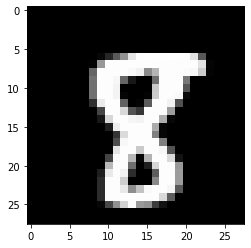

In [12]:
plt.imshow(images[1].squeeze(), cmap='gray');

### Defining Neural Network Architecture

In [13]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(784, 256)
        
        self.output = nn.Linear(256, 10)
    
    def forward(self, x):
        
        x = torch.sigmoid(self.hidden(x))
        
        x = F.softmax(self.output(x), dim=1)
        
        return x

In [14]:
model = Net()

### Training neural networks

In [15]:
epochs = 5
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

for e in range(epochs):
    running_loss = 0.0 
    for images, labels in train_loader:
        images = images.view(images.shape[0], -1)
        
        optimizer.zero_grad()
        ## forward pass
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("training loss", running_loss/len(train_loader))

training loss 1.6641068875408376
training loss 1.5401343576181163
training loss 1.5224321224033706
training loss 1.5120605773000575
training loss 1.5053194624020347


#### Testing model

In [66]:
# set the model in inference mode with model.eval()

In [67]:
model.eval()
dataiter = iter(test_loader)
images, labels = dataiter.next()
img = images[0]
# Convert 2D image to 1D vector
img = img.view(1, 784)

with torch.no_grad():
     output = model(img)
_, predicted = torch.max(output, 1)

In [68]:
predicted

tensor([3])

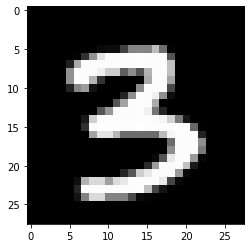

In [69]:
plt.imshow(images[0].squeeze(), cmap='gray');

In [70]:
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images = images.view(images.shape[0], -1)
        output = model(images)
        _, predicted = torch.max(output, dim=1)
        correct += (predicted==labels).sum().item()
        total += labels.size()[0]
print("Accuracy of the model out of {} images: {}".format(total, correct/total))

Accuracy of the model out of 10000 images: 0.9611
